In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

In [5]:
df = pd.read_csv('12cdenhanced.csv')

In [18]:
geodf = gpd.read_file('election_districts.geojson')

In [19]:
# counter = 0
# def find_elect_dist(row):
#     point = Point(row.Longitude, row.Latitude)
#     return geodf.elect_dist[geodf.geometry.contains(point)]

# test_df = df.iloc[:100, :].copy()
# for i in range(100):
#     print(find_elect_dist(test_df.iloc[i, :]))
#     print(test_df.iloc[i, :]['Precinct'])

In [20]:
def convert_elect_dist(string):
    return string[-2:] + string[-6:-3]
df['elect_dist'] = df.Precinct.apply(convert_elect_dist)

In [21]:
latest_primary_voter_count = pd.DataFrame(df.groupby('elect_dist')['Primary_2018-06-26'].count())

In [22]:
geodf = geodf.merge(latest_primary_voter_count, how = 'inner', on = 'elect_dist')

In [23]:
geodf = geodf.rename(columns = {'Primary_2018-06-26':'primary18'})

In [24]:
geodf.columns.values

array(['elect_dist', 'shape_area', 'shape_leng', 'geometry', 'primary18'],
      dtype=object)

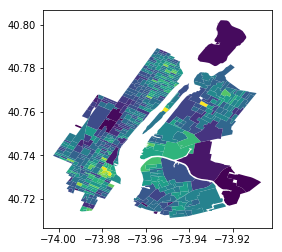

In [25]:
geodf.plot(column = 'primary18')